# Interpolation Exercise 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
from scipy.interpolate import griddata

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [87]:
x = np.hstack((np.linspace(-4,4,9), np.full(11, -5), np.linspace(-4,4,9), np.full(11, 5), [0]))
y = np.hstack((np.full(9,-5), np.linspace(-5, 5,11), np.full(9,5), np.linspace(-5,5,11), [0]))
f = np.hstack((np.zeros(20), np.zeros(20),[1.0]))
print(f)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.]


The following plot should show the points on the boundary and the single point in the interior:

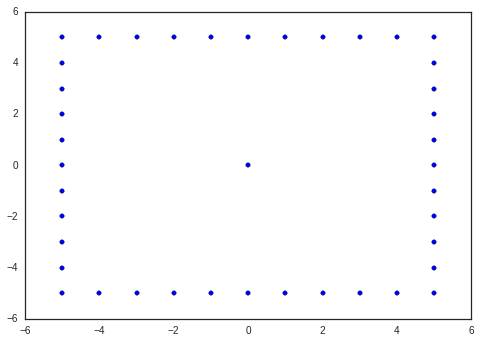

In [88]:
plt.scatter(x, y);

In [89]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

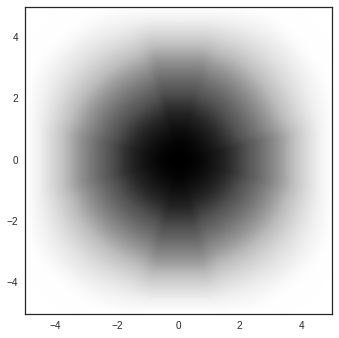

In [109]:
xnew = np.linspace(-5, 5, 100)
ynew = np.linspace(-5, 5, 100)
Xnew, Ynew = np.meshgrid(xnew, ynew)
Fnew = griddata((x, y), f , (Xnew, Ynew),  method='cubic')
plt.imshow(Fnew, extent=(-5,5,-5,5))

In [110]:
assert xnew.shape==(100,)
assert ynew.shape==(100,)
assert Xnew.shape==(100,100)
assert Ynew.shape==(100,100)
assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

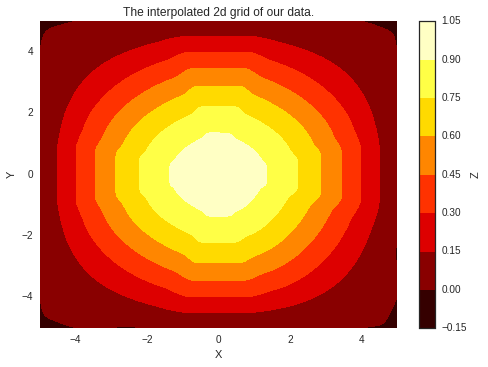

In [117]:
plt.contourf(Xnew, Ynew, Fnew, cmap='hot')
plt.colorbar(label='Z')
plt.box(False)
plt.title("The interpolated 2d grid of our data.")
plt.xlabel('X')
plt.ylabel('Y');

In [108]:
assert True # leave this to grade the plot